Scraping data from Yahoo Finance

In [29]:
# Import dependencies
import yfinance as yf
from datetime import date

In [5]:
# Retrieve today's date and format to %Y-%m-%d format
today = date.today()
d = today.strftime("%Y-%m-%d")
print(d)

2021-02-14


In [6]:
# Retrieving Tesla stock data from 2016-01-01 to 2021-02-09
TSLA_data = yf.download("TSLA","2016-01-01",d)

[*********************100%***********************]  1 of 1 completed


In [7]:
# Check formatting
TSLA_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
TSLA_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,47.702000,48.689999,47.674000,48.001999,48.001999,13575000
2016-01-04,46.144001,46.276001,43.799999,44.681999,44.681999,34135500
2016-01-05,45.271999,45.377998,44.000000,44.686001,44.686001,15934000
2016-01-06,44.000000,44.009998,43.195999,43.807999,43.807999,18895500
2016-01-07,42.838001,43.688000,42.734001,43.130001,43.130001,17771500
...,...,...,...,...,...,...
2021-02-08,869.669983,877.770020,854.750000,863.419983,863.419983,20161700
2021-02-09,855.119995,859.799988,841.750000,849.460022,849.460022,15157700
2021-02-10,843.640015,844.820007,800.020020,804.820007,804.820007,36216100


In [9]:
TSLA_data = TSLA_data.reset_index()

In [10]:
TSLA_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-31,47.702000,48.689999,47.674000,48.001999,48.001999,13575000
1,2016-01-04,46.144001,46.276001,43.799999,44.681999,44.681999,34135500
2,2016-01-05,45.271999,45.377998,44.000000,44.686001,44.686001,15934000
3,2016-01-06,44.000000,44.009998,43.195999,43.807999,43.807999,18895500
4,2016-01-07,42.838001,43.688000,42.734001,43.130001,43.130001,17771500
...,...,...,...,...,...,...,...
1284,2021-02-08,869.669983,877.770020,854.750000,863.419983,863.419983,20161700
1285,2021-02-09,855.119995,859.799988,841.750000,849.460022,849.460022,15157700
1286,2021-02-10,843.640015,844.820007,800.020020,804.820007,804.820007,36216100
1287,2021-02-11,812.440002,829.880005,801.729980,811.659973,811.659973,21580700


In [11]:
TSLA_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [12]:
# Retrieving Microsoft stock data from 2016-01-01 to 2021-02-09
MSFT_data = yf.download("MSFT","2016-01-01",d)

[*********************100%***********************]  1 of 1 completed


In [13]:
MSFT_data = MSFT_data.reset_index()

In [14]:
GME_data = yf.download("GME","2016-01-01",d)

[*********************100%***********************]  1 of 1 completed


In [15]:
# Retrieving GameStop stock data from 2016-01-01 to 2021-02-09
GME_data = GME_data.reset_index()

In [16]:
TSLA_data.to_csv("../data/TSLA_stock.csv",index=False)
MSFT_data.to_csv("../data/MSFT_stock.csv",index=False)
GME_data.to_csv("../data/GME_stock.csv",index=False)

Load dataframes into SQLite Database

In [17]:
# SQL Alchemy
from sqlalchemy import create_engine
database_path = "../sqlite_db/stock_market_sqlite.db"

In [18]:
# Create Engine
engine = create_engine(f"sqlite:///{database_path}", echo=True)
sqlite_connection = engine.connect()

2021-02-14 01:26:53,125 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-02-14 01:26:53,127 INFO sqlalchemy.engine.base.Engine ()
2021-02-14 01:26:53,132 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-02-14 01:26:53,133 INFO sqlalchemy.engine.base.Engine ()


In [19]:
# Add TSLA, MSFT and GME stock market data to TSLA table
TSLA_data.to_sql('TSLA',sqlite_connection,if_exists='replace')
MSFT_data.to_sql('MSFT',sqlite_connection,if_exists='replace')
GME_data.to_sql('GME',sqlite_connection,if_exists='replace')

2021-02-14 01:26:57,159 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("TSLA")
2021-02-14 01:26:57,161 INFO sqlalchemy.engine.base.Engine ()
2021-02-14 01:26:57,172 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("TSLA")
2021-02-14 01:26:57,175 INFO sqlalchemy.engine.base.Engine ()
2021-02-14 01:26:57,178 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-02-14 01:26:57,180 INFO sqlalchemy.engine.base.Engine ()
2021-02-14 01:26:57,186 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("TSLA")
2021-02-14 01:26:57,188 INFO sqlalchemy.engine.base.Engine ()
2021-02-14 01:26:57,192 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2021-02-14 01:26:57,194 INFO sqlalchemy.engine.base.Engine ('TSLA',)
2021-02-14 01:26:57,197 INFO sqlalchemy.engine.base.Engine PRAGMA main.foreign_key_list("TSLA")
2021-02-1

In [20]:
# Check if data is loaded
engine.execute("SELECT * FROM TSLA").fetchall()

2021-02-14 01:27:07,690 INFO sqlalchemy.engine.base.Engine SELECT * FROM TSLA
2021-02-14 01:27:07,691 INFO sqlalchemy.engine.base.Engine ()


[(0, '2015-12-31 00:00:00.000000', 47.70199966430664, 48.689998626708984, 47.67399978637695, 48.00199890136719, 48.00199890136719, 13575000),
 (1, '2016-01-04 00:00:00.000000', 46.14400100708008, 46.2760009765625, 43.79999923706055, 44.68199920654297, 44.68199920654297, 34135500),
 (2, '2016-01-05 00:00:00.000000', 45.27199935913086, 45.37799835205078, 44.0, 44.68600082397461, 44.68600082397461, 15934000),
 (3, '2016-01-06 00:00:00.000000', 44.0, 44.0099983215332, 43.19599914550781, 43.80799865722656, 43.80799865722656, 18895500),
 (4, '2016-01-07 00:00:00.000000', 42.8380012512207, 43.6879997253418, 42.73400115966797, 43.130001068115234, 43.130001068115234, 17771500),
 (5, '2016-01-08 00:00:00.000000', 43.571998596191406, 44.0880012512207, 42.15399932861328, 42.20000076293945, 42.20000076293945, 18140500),
 (6, '2016-01-11 00:00:00.000000', 42.801998138427734, 42.88999938964844, 40.599998474121094, 41.56999969482422, 41.56999969482422, 20457000),
 (7, '2016-01-12 00:00:00.000000', 42.

In [21]:
engine.execute("SELECT * FROM MSFT").fetchall()

2021-02-14 01:27:09,138 INFO sqlalchemy.engine.base.Engine SELECT * FROM MSFT
2021-02-14 01:27:09,140 INFO sqlalchemy.engine.base.Engine ()


[(0, '2015-12-31 00:00:00.000000', 56.040000915527344, 56.189998626708984, 55.41999816894531, 55.47999954223633, 50.62727355957031, 27334100),
 (1, '2016-01-04 00:00:00.000000', 54.31999969482422, 54.79999923706055, 53.38999938964844, 54.79999923706055, 50.006744384765625, 53778000),
 (2, '2016-01-05 00:00:00.000000', 54.93000030517578, 55.38999938964844, 54.540000915527344, 55.04999923706055, 50.23487854003906, 34079700),
 (3, '2016-01-06 00:00:00.000000', 54.31999969482422, 54.400001525878906, 53.63999938964844, 54.04999923706055, 49.32234573364258, 39518900),
 (4, '2016-01-07 00:00:00.000000', 52.70000076293945, 53.4900016784668, 52.06999969482422, 52.16999816894531, 47.606788635253906, 56564900),
 (5, '2016-01-08 00:00:00.000000', 52.369998931884766, 53.279998779296875, 52.150001525878906, 52.33000183105469, 47.75279235839844, 48754000),
 (6, '2016-01-11 00:00:00.000000', 52.5099983215332, 52.849998474121094, 51.459999084472656, 52.29999923706055, 47.72541046142578, 36943800),
 (7,

In [22]:
engine.execute("SELECT * FROM GME").fetchall()

2021-02-14 01:27:34,244 INFO sqlalchemy.engine.base.Engine SELECT * FROM GME
2021-02-14 01:27:34,246 INFO sqlalchemy.engine.base.Engine ()


[(0, '2015-12-31 00:00:00.000000', 28.43000030517578, 28.860000610351562, 28.030000686645508, 28.040000915527344, 21.640424728393555, 1696000),
 (1, '2016-01-04 00:00:00.000000', 27.040000915527344, 28.459999084472656, 27.010000228881836, 28.309999465942383, 21.848804473876953, 4330400),
 (2, '2016-01-05 00:00:00.000000', 28.59000015258789, 29.010000228881836, 28.059999465942383, 28.770000457763672, 22.20381736755371, 3416600),
 (3, '2016-01-06 00:00:00.000000', 28.229999542236328, 28.739999771118164, 27.440000534057617, 28.3700008392334, 21.89510726928711, 3756400),
 (4, '2016-01-07 00:00:00.000000', 28.1200008392334, 28.770000457763672, 27.739999771118164, 28.450000762939453, 21.956851959228516, 2662800),
 (5, '2016-01-08 00:00:00.000000', 28.700000762939453, 28.790000915527344, 28.040000915527344, 28.3700008392334, 21.89510726928711, 2699200),
 (6, '2016-01-11 00:00:00.000000', 28.329999923706055, 29.549999237060547, 27.989999771118164, 29.3799991607666, 22.67459487915039, 3256700),

In [23]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error
from pandas import datetime

In [24]:
tsla_data = pd.read_csv("../data/TSLA_stock.csv",parse_dates = ["Date"], index_col = ["Date"])
msft_data = pd.read_csv("../data/MSFT_stock.csv")
gme_data = pd.read_csv("../data/GME_stock.csv")

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

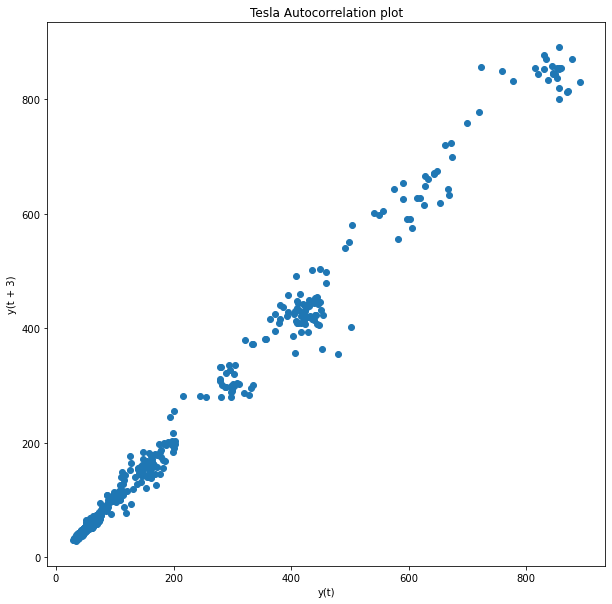

In [25]:
plt.figure(figsize=(10,10))
lag_plot(tsla_data["Open"],lag=3)
plt.title("Tesla Autocorrelation plot")

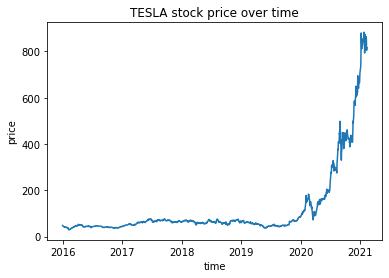

In [26]:
plt.plot(tsla_data["Close"])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [27]:
train_data, test_data = tsla_data[0:int(len(tsla_data)*0.7)], tsla_data[int(len(tsla_data)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 252.11830725442195


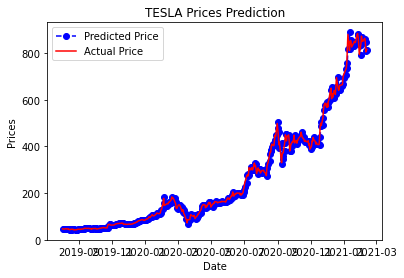

In [28]:
test_set_range = tsla_data[int(len(tsla_data)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()